In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
X = df[["sepal_length", "sepal_width"]]

#Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# value of K
k = 3

# implementing K-Means
kmeans = KMeans(
    n_clusters=k,
    init="k-means++",
    max_iter=300,
    random_state=42
)

kmeans.fit(X_scaled)


,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [6]:
# getting Cluster Assignments
labels = kmeans.labels_
labels[:75]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int32)

In [7]:
df["cluster"]=labels
df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,2
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,2
4,5.0,3.6,1.4,0.2,setosa,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


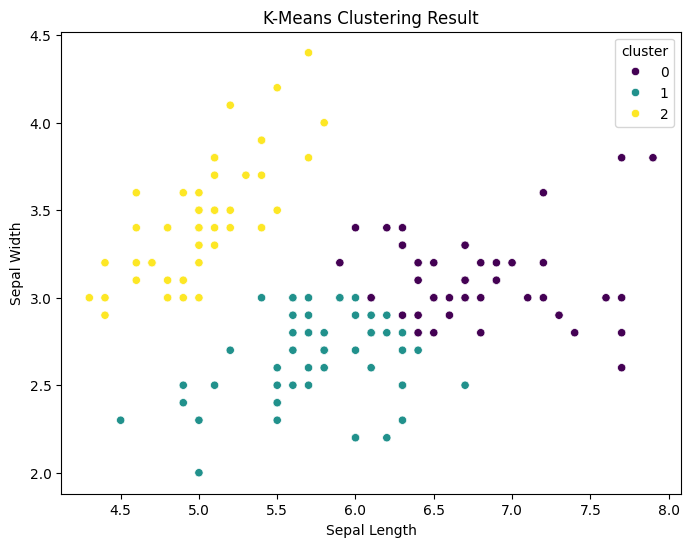

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df["sepal_length"],
    y=df["sepal_width"],
    hue=df["cluster"],
    palette="viridis"
)

plt.title("K-Means Clustering Result")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

In [9]:
# finding Optimal k (Elbow Method)
inertia_values = []

k_range = range(1,11)

for k in k_range:
  km = KMeans(n_clusters=k, init="k-means++", random_state=42)
  km.fit(X_scaled)
  inertia_values.append(km.inertia_)

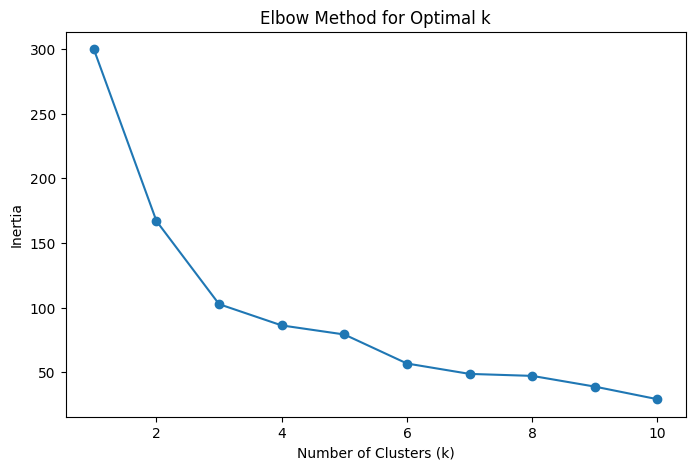

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [11]:
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.43431274171399686
